<a href="https://colab.research.google.com/github/LakshmipriyaA76/Data-Camp/blob/main/Capstone%20Models1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

! apt-get install git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [4]:
!git clone https://github.com/Kanchan786786/Capstone_project-.git

fatal: destination path 'Capstone_project-' already exists and is not an empty directory.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/refs/heads/main/Datasets/AAPL_1D.csv"
df = pd.read_csv(url)

In [5]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   11124 non-null  object 
 1   Week Date               11124 non-null  object 
 2   Close                   11124 non-null  float64
 3   High                    11124 non-null  float64
 4   Low                     11124 non-null  float64
 5   Open                    11124 non-null  float64
 6   Volume                  11124 non-null  float64
 7   VWAP                    11124 non-null  float64
 8   Adjusted Close          11124 non-null  float64
 9   Market Cap              11124 non-null  float64
 10  Bid Price               11124 non-null  float64
 11  Ask Price               11124 non-null  float64
 12  SMA_50                  11075 non-null  float64
 13  EMA_50                  11075 non-null  float64
 14  RSI            

In [ ]:
df.head()

,Price,Week Date,Close,High,Low,Open,Volume,VWAP,Adjusted Close,Market Cap,Bid Price,Ask Price,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Target Variable - High,Target Variable - Low
0,1980-12-12,Fri,0.10,0.10,0.10,0.10,469033600.0,0.10,0.10,3.572854e+12,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,Mon,0.09,0.09,0.09,0.09,175884800.0,0.09,0.09,3.572854e+12,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,Tue,0.09,0.09,0.09,0.09,105728000.0,0.09,0.09,3.572854e+12,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,Wed,0.09,0.09,0.09,0.09,86441600.0,0.09,0.09,3.572854e+12,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,Thu,0.09,0.09,0.09,0.09,73449600.0,0.09,0.09,3.572854e+12,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

<Axes: xlabel='Date'>

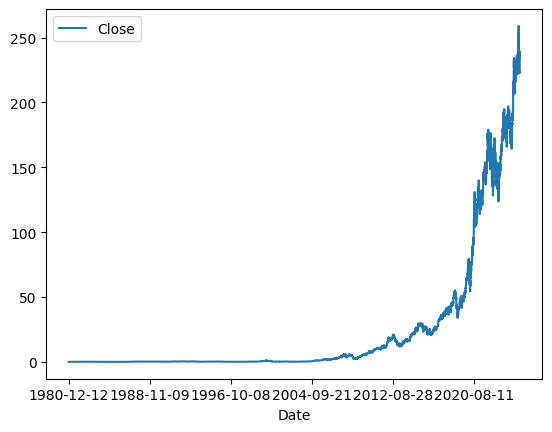

In [ ]:
df.plot.line(y="Close", use_index=True, x='Date')

In [ ]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

df = df.set_index('Date')

In [ ]:
df

,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,...,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Target_Variable_-_High,Target_Variable_-_Low,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,Fri,0.10,0.10,0.10,0.100,469033600.0,0.100,0.10,3.572854e+12,237.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0
1980-12-15,Mon,0.09,0.09,0.09,0.090,175884800.0,0.090,0.09,3.572854e+12,237.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0
1980-12-16,Tue,0.09,0.09,0.09,0.090,105728000.0,0.090,0.09,3.572854e+12,237.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0
1980-12-17,Wed,0.09,0.09,0.09,0.090,86441600.0,0.090,0.09,3.572854e+12,237.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0
1980-12-18,Thu,0.09,0.09,0.09,0.090,73449600.0,0.090,0.09,3.572854e+12,237.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,Fri,222.78,225.63,221.41,224.780,54697900.0,223.273,222.78,3.572850e+12,237.32,...,239.143,237.067,30.770,-5.564,-3.171,-2.393,NaN,NaN,229.86,1
2025-01-27,Mon,229.86,232.15,223.98,224.020,94863400.0,228.663,229.86,3.572850e+12,237.32,...,239.255,236.784,42.207,-5.228,-3.583,-1.645,NaN,NaN,238.26,1
2025-01-28,Tue,238.26,240.19,230.81,230.850,75707600.0,236.420,238.26,3.572850e+12,237.32,...,239.536,236.842,52.280,-4.235,-3.713,-0.522,NaN,NaN,239.36,1


In [ ]:
aapl = df.loc["2000-01-01":].copy()
del aapl["Target_Variable_-_High"]
del aapl["Target_Variable_-_Low"]

In [ ]:
aapl

,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,Mon,0.843,0.847,0.766,0.790,535796800.0,0.819,0.843,3.572850e+12,237.32,250.59,0.713,0.711,64.527,0.017,0.017,0.000,0.772,0
2000-01-04,Tue,0.772,0.833,0.762,0.815,512377600.0,0.789,0.772,3.572850e+12,237.32,250.59,0.718,0.713,52.470,0.016,0.017,-0.001,0.783,1
2000-01-05,Wed,0.783,0.833,0.776,0.781,778321600.0,0.797,0.783,3.572850e+12,237.32,250.59,0.722,0.716,53.943,0.016,0.017,-0.001,0.716,0
2000-01-06,Thu,0.716,0.806,0.716,0.799,767972800.0,0.746,0.716,3.572850e+12,237.32,250.59,0.725,0.716,44.943,0.010,0.015,-0.005,0.749,1
2000-01-07,Fri,0.749,0.761,0.719,0.727,460734400.0,0.743,0.749,3.572850e+12,237.32,250.59,0.728,0.717,49.481,0.008,0.014,-0.006,0.736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,Fri,222.780,225.630,221.410,224.780,54697900.0,223.273,222.780,3.572850e+12,237.32,250.59,239.143,237.067,30.770,-5.564,-3.171,-2.393,229.860,1
2025-01-27,Mon,229.860,232.150,223.980,224.020,94863400.0,228.663,229.860,3.572850e+12,237.32,250.59,239.255,236.784,42.207,-5.228,-3.583,-1.645,238.260,1
2025-01-28,Tue,238.260,240.190,230.810,230.850,75707600.0,236.420,238.260,3.572850e+12,237.32,250.59,239.536,236.842,52.280,-4.235,-3.713,-0.522,239.360,1


In [ ]:
aapl.shape

(6308, 19)

##Basic Models

Linear Classifier

Precision Score for Linear Classifier: 0.56


<Axes: xlabel='Date'>

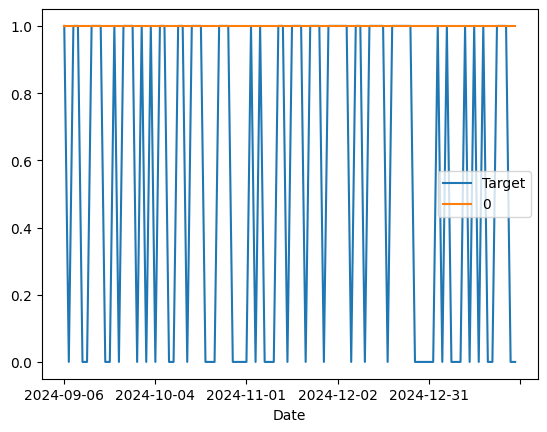

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=1)

# Split your data into training and testing sets
train = aapl.iloc[:-100]
test = aapl.iloc[-100:]

# Define the predictors (independent variables) and target (dependent variable)
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Train the model
model.fit(train[predictors], train["Target"])

# Predict the target values on the test set
preds = model.predict(test[predictors])

# Convert predictions to a pandas Series with the same index as the test set
preds = pd.Series(preds, index=test.index)

# Calculate the precision score
precision = precision_score(test["Target"], preds)
print("Precision Score for Linear Classifier:", precision)

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()


Random Forest

Precision Score for Random Forest: 0.5405405405405406


<Axes: xlabel='Date'>

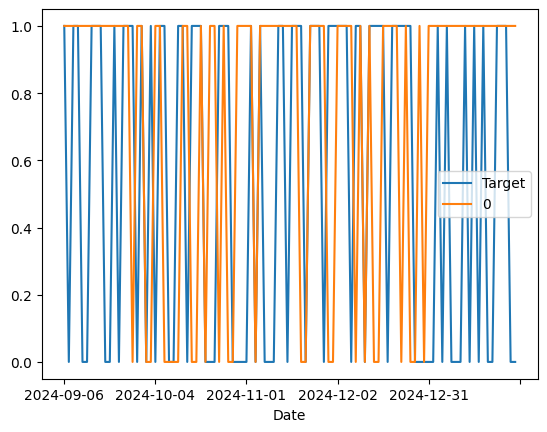

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = aapl.iloc[:-100]
test = aapl.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision = precision_score(test["Target"], preds)
print("Precision Score for Random Forest:", precision)

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

##Complex Models

LSTM

In [ ]:
# Strategy 1: Numerical Columns (e.g., prices)
# For numerical columns, we can use imputation methods like mean, median, or mode.
# We'll use the mean for demonstration.  You might choose median if there are outliers.

numerical_cols = aapl.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if aapl[col].isnull().any():  # Check if the column actually has missing values
        aapl[col] = aapl[col].fillna(aapl[col].mean()) #Fill with mean

# Strategy 2: Categorical Columns (if any)
# For categorical columns, we can use the mode (most frequent value)
#  or a special value like 'Unknown'.

categorical_cols = aapl.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
  if aapl[col].isnull().any(): #check if the column has any null values
    aapl[col] = aapl[col].fillna(aapl[col].mode()[0])

#Verify if there are any null values left
print("\nMissing Values After Handling:\n")
print(aapl.isnull().sum())





Missing Values After Handling:

Day               0
Close             0
High              0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
Bid_Date          0
Ask_Date          0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
Tomorrow          0
Target            0
dtype: int64


In [ ]:
# Display data types of each column
aapl.dtypes


,0
Day,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,float64
VWAP,float64
Adjusted_Close,float64
Market_Cap,float64
Bid_Date,float64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - loss: 0.4130 - val_loss: 0.2492
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - loss: 0.2577 - val_loss: 0.2492
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 0.2554 - val_loss: 0.2490
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.2531 - val_loss: 0.2494
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - loss: 0.2530 - val_loss: 0.2490
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - loss: 0.2510 - val_loss: 0.2494
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.2518 - val_loss: 0.2502
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - loss: 0.2535 - val_loss: 0.2509
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - loss: 0.2506 - val_loss: 0.2503
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - loss: 0.2512 - val_loss: 0.2494
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 0.2507 - val_loss: 0.2491
Epoch 12/50
157/157 ━━━━━━━━━

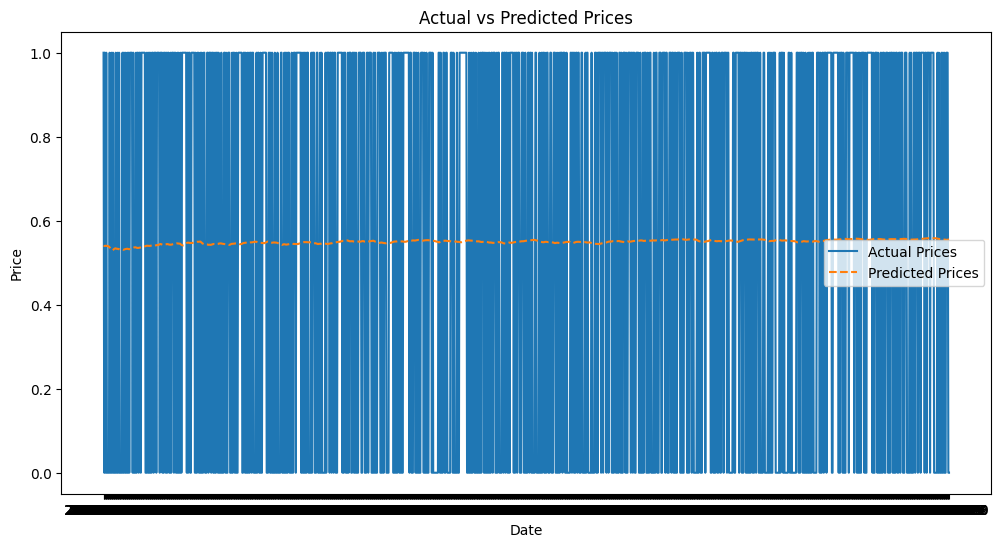

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = 'Target'

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
aapl_scaled = pd.DataFrame(scaler.fit_transform(aapl[features + [target]]), columns=features + [target], index=aapl.index)

# Prepare sequences for LSTM
def create_sequences(data, feature_cols, target_col, time_steps=60):
    np.random.seed(42)
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
X, y = create_sequences(aapl_scaled, features, target, time_steps)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25,activation='sigmoid'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions.reshape(-1, 1)), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(aapl.index[-len(y_test):], y_test_inv, label="Actual Prices")
plt.plot(aapl.index[-len(y_test):], predictions_inv, label="Predicted Prices", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

Mean Squared Error on Test Data: 0.24947068095207214
R-squared on Test Data: -0.0015851516788667475

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,705 (397.29 KB)

 Trainable params: 33,901 (132.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,804 (264.86 KB)


Training History:
dict_keys(['loss', 'val_loss'])


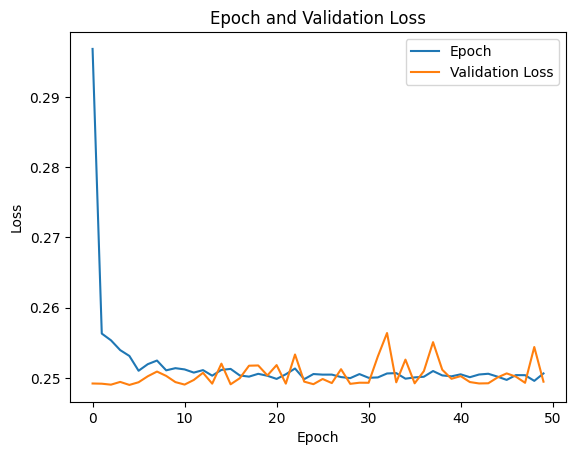

In [ ]:


import matplotlib.pyplot as plt
# Assuming your model and data are already loaded as in the provided code.

# Evaluate the model (example using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_inv, predictions_inv)
print(f"R-squared on Test Data: {r_squared}")


# Additional model summary information
print("\nModel Summary:")
model.summary()

# Access training history
print("\nTraining History:")
print(history.history.keys()) #prints all the metrics available in training history
# Example of plotting training and validation loss
plt.plot(history.history['loss'], label='Epoch')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch and Validation Loss')
plt.show()


In [ ]:
# prompt: check the accuraacy for X_train, y_train on my above modle

import numpy as np
# Assuming your model and data are already loaded as in the provided code.

# Evaluate the model on training data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f"Mean Squared Error on Training Data: {train_loss}")

# Make predictions on training data
train_predictions = model.predict(X_train)

# Inverse transform the predictions and actual values for training data
train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions.reshape(-1, 1)), axis=1))[:, -1]
y_train_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]

# Calculate R-squared for training data
r_squared_train = r2_score(y_train_inv, train_predictions_inv)
print(f"R-squared on Training Data: {r_squared_train}")


Mean Squared Error on Training Data: 0.24932654201984406
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
R-squared on Training Data: 0.0016964121656850573


In [ ]:
# prompt: Now chack same on testing dataaccuracy

import matplotlib.pyplot as plt
import numpy as np


# Evaluate the model (example using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

# Calculate R-squared
r_squared = r2_score(y_test_inv, predictions_inv)
print(f"R-squared on Test Data: {r_squared}")


# Additional model summary information
print("\nModel Summary:")
model.summary()






Mean Squared Error on Test Data: 0.24947068095207214
R-squared on Test Data: -0.0015851516788667475

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,705 (397.29 KB)

 Trainable params: 33,901 (132.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,804 (264.86 KB)



### Model Explanation:

#### This code builds and trains a Long Short-Term Memory (LSTM) network to predict the 'Target_Variable_-_High'
#### (likely a stock price) based on various features (e.g., closing price, volume, technical indicators).

#### 1. Data Preprocessing:

##### Data is loaded from an Excel file and preprocessed to handle missing values.
##### Features are normalized to the range [0, 1] using MinMaxScaler, which improves the training process.
##### The data is transformed into sequences of past observations, suitable for the LSTM.  The `time_steps` variable (set to 60) indicates the LSTM will look at the past 60 time steps to predict the next one.


### 2. LSTM Model Architecture:

#### The model consists of:

####  Two LSTM layers: LSTM layers are designed to process sequential data, capturing long-term dependencies in the time series.  
####  The first LSTM layer returns its sequences, meaning the output of this layer is still a sequence of vectors. This is importantfor the second LSTM layer. The second LSTM layer does not return sequences.  `return_sequences=False` means it processes the whole sequence of output vectors from the first LSTM layer and outputs a single vector. Each layer has 50 units, which can be thought of as the dimensionality of the internal representation (hidden state) of the LSTM.
####  Dropout layers: Dropout is a regularization technique that randomly drops units during training, helping prevent overfitting.
#### Dense layers: A fully connected layer with 25 neurons, and a final output layer with one neuron to predict the target variable.


### 3. Training and Evaluation:

#### The model is compiled with the Adam optimizer and mean squared error (MSE) loss function. MSE is well suited for regression tasks
#### Training history is saved into the `history` variable.  This lets you plot training loss vs. validation loss.


### 4. What LSTM is doing:
####  LSTM layers are designed to address the vanishing gradient problem, which makes it difficult for traditional recurrent networks to learn long-range dependencies. LSTMs use a clever internal mechanism called gates, (input, output, forget).  These gates control how much of the past information is remembered or forgotten as new data comes in.


### 5. Insights:
####  The R-squared values for the training and test sets reveal how well the model fits the data and how generalizable the model is to unseen data.
####  Comparing the plots of actual vs. predicted values is crucial to assess the model's predictive power.  

### Further Analysis:
#### Examine the training history to detect any overfitting.
#### Experiment with different hyperparameters (e.g., number of LSTM layers, number of units, dropout rates, time steps).



XG Boost

Precision Score: 0.575


<Axes: xlabel='Date'>

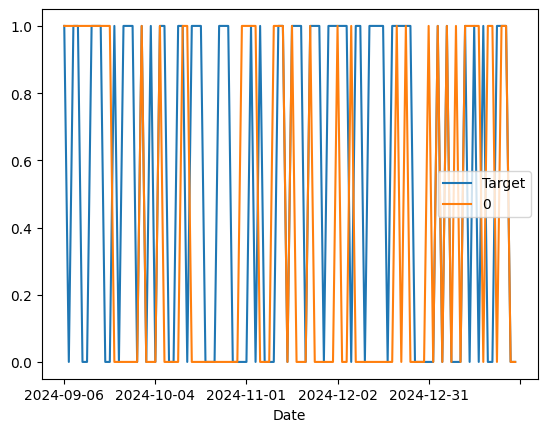

In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score

# Initialize the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, random_state=1)

# Split your data into training and testing sets
train = aapl.iloc[:-100]
test = aapl.iloc[-100:]

# Define the predictors (independent variables) and target (dependent variable)
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Train the model
model.fit(train[predictors], train["Target"])

# Predict the target values on the test set
preds = model.predict(test[predictors])

# Convert predictions to a pandas Series with the same index as the test set
preds = pd.Series(preds, index=test.index)

# Calculate the precision score
precision = precision_score(test["Target"], preds)
print("Precision Score:", precision)

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()


In [ ]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


def backtest(data, model, predictors, start=500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(aapl, model, predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5070422535211268

## SVM Model

In [ ]:
pip install arch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.8 MB/s eta 0:00:00


Training Accuracy: 0.5480
Testing Accuracy: 0.4746
Precision Score: 0.5577


<Axes: title={'center': 'SVM - Actual vs Predicted Stock Movement'}, xlabel='Date'>

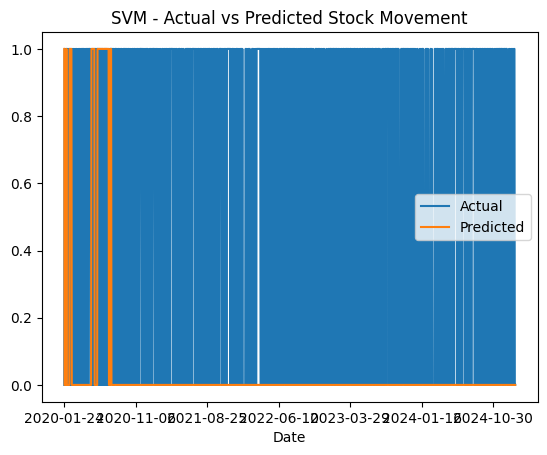

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score

# Define features and target
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = "Target"

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.2, random_state=1, shuffle=False)

# Standardize the predictors (SVM performs better with scaled data)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Initialize the SVM model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=1)

# Train the SVM model
svm_model.fit(train_scaled, train[target])

# Predict on training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Convert predictions to pandas Series
train_preds = pd.Series(train_preds, index=train.index)
test_preds = pd.Series(test_preds, index=test.index)

# Calculate accuracy and precision
train_accuracy = accuracy_score(train[target], train_preds)
test_accuracy = accuracy_score(test[target], test_preds)
precision = precision_score(test[target], test_preds)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")

# Plot actual vs predicted values
combined = pd.concat([test[target], test_preds], axis=1)
combined.columns = ["Actual", "Predicted"]
combined.plot(title="SVM - Actual vs Predicted Stock Movement")


Prophet


In [ ]:
# prompt: show me the columns of aapl

aapl.columns


Index(['Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow',
       'Target'],
      dtype='object')

In [ ]:
# prompt: show missing value of aapl

print("\nMissing Values:\n")
print(aapl.isnull().sum())



Missing Values:

Day               0
Close             0
High              0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
Bid_Date          0
Ask_Date          0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
Tomorrow          0
Target            0
dtype: int64


In [ ]:
# prompt: show numerical and categorical value of aapl

import numpy as np
# Numerical features
numerical_features = aapl.select_dtypes(include=np.number).columns
print("Numerical features:\n", numerical_features)

# Categorical features (if any)
categorical_features = aapl.select_dtypes(exclude=np.number).columns
print("\nCategorical features:\n", categorical_features)


Numerical features:
 Index(['Close', 'High', 'Low', 'Open', 'Volume', 'VWAP', 'Adjusted_Close',
       'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50', 'EMA_50', 'RSI', 'MACD',
       'MACD_Signal', 'MACD_Hist', 'Tomorrow', 'Target'],
      dtype='object')

Categorical features:
 Index(['Day'], dtype='object')


In [ ]:

!pip install prophet


In [ ]:
aapl

,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,Mon,0.843,0.847,0.766,0.790,535796800.0,0.819,0.843,3.572850e+12,237.32,250.59,0.713,0.711,64.527,0.017,0.017,0.000,0.772,0
2000-01-04,Tue,0.772,0.833,0.762,0.815,512377600.0,0.789,0.772,3.572850e+12,237.32,250.59,0.718,0.713,52.470,0.016,0.017,-0.001,0.783,1
2000-01-05,Wed,0.783,0.833,0.776,0.781,778321600.0,0.797,0.783,3.572850e+12,237.32,250.59,0.722,0.716,53.943,0.016,0.017,-0.001,0.716,0
2000-01-06,Thu,0.716,0.806,0.716,0.799,767972800.0,0.746,0.716,3.572850e+12,237.32,250.59,0.725,0.716,44.943,0.010,0.015,-0.005,0.749,1
2000-01-07,Fri,0.749,0.761,0.719,0.727,460734400.0,0.743,0.749,3.572850e+12,237.32,250.59,0.728,0.717,49.481,0.008,0.014,-0.006,0.736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,Fri,222.780,225.630,221.410,224.780,54697900.0,223.273,222.780,3.572850e+12,237.32,250.59,239.143,237.067,30.770,-5.564,-3.171,-2.393,229.860,1
2025-01-27,Mon,229.860,232.150,223.980,224.020,94863400.0,228.663,229.860,3.572850e+12,237.32,250.59,239.255,236.784,42.207,-5.228,-3.583,-1.645,238.260,1
2025-01-28,Tue,238.260,240.190,230.810,230.850,75707600.0,236.420,238.260,3.572850e+12,237.32,250.59,239.536,236.842,52.280,-4.235,-3.713,-0.522,239.360,1


In [ ]:
aapl.columns

Index(['Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow',
       'Target'],
      dtype='object')

In [ ]:
aapl

,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,Mon,0.843,0.847,0.766,0.790,535796800.0,0.819,0.843,3.572850e+12,237.32,250.59,0.713,0.711,64.527,0.017,0.017,0.000,0.772,0
2000-01-04,Tue,0.772,0.833,0.762,0.815,512377600.0,0.789,0.772,3.572850e+12,237.32,250.59,0.718,0.713,52.470,0.016,0.017,-0.001,0.783,1
2000-01-05,Wed,0.783,0.833,0.776,0.781,778321600.0,0.797,0.783,3.572850e+12,237.32,250.59,0.722,0.716,53.943,0.016,0.017,-0.001,0.716,0
2000-01-06,Thu,0.716,0.806,0.716,0.799,767972800.0,0.746,0.716,3.572850e+12,237.32,250.59,0.725,0.716,44.943,0.010,0.015,-0.005,0.749,1
2000-01-07,Fri,0.749,0.761,0.719,0.727,460734400.0,0.743,0.749,3.572850e+12,237.32,250.59,0.728,0.717,49.481,0.008,0.014,-0.006,0.736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,Fri,222.780,225.630,221.410,224.780,54697900.0,223.273,222.780,3.572850e+12,237.32,250.59,239.143,237.067,30.770,-5.564,-3.171,-2.393,229.860,1
2025-01-27,Mon,229.860,232.150,223.980,224.020,94863400.0,228.663,229.860,3.572850e+12,237.32,250.59,239.255,236.784,42.207,-5.228,-3.583,-1.645,238.260,1
2025-01-28,Tue,238.260,240.190,230.810,230.850,75707600.0,236.420,238.260,3.572850e+12,237.32,250.59,239.536,236.842,52.280,-4.235,-3.713,-0.522,239.360,1


In [ ]:
aapl = aapl.reset_index()  # Moves Date back as a normal column
print(aapl[['Date', 'Day']])  # Now you can access both explicitly


            Date  Day
0     2000-01-03  Mon
1     2000-01-04  Tue
2     2000-01-05  Wed
3     2000-01-06  Thu
4     2000-01-07  Fri
...          ...  ...
6303  2025-01-24  Fri
6304  2025-01-27  Mon
6305  2025-01-28  Tue
6306  2025-01-29  Wed
6307  2025-01-30  Thu

[6308 rows x 2 columns]


In [ ]:

# Delete the 'Target' column
if 'Target' in aapl.columns:
    aapl = aapl.drop(columns=['Target'])

# Encode the 'Day' column (assuming it's categorical)
if 'Day' in aapl.columns:
    aapl['Day'] = pd.Categorical(aapl['Day']).codes

# Display the updated DataFrame
print(aapl.head())


         Date  Day  Close   High    Low   Open       Volume   VWAP  \
0  2000-01-03    1  0.843  0.847  0.766  0.790  535796800.0  0.819   
1  2000-01-04    3  0.772  0.833  0.762  0.815  512377600.0  0.789   
2  2000-01-05    4  0.783  0.833  0.776  0.781  778321600.0  0.797   
3  2000-01-06    2  0.716  0.806  0.716  0.799  767972800.0  0.746   
4  2000-01-07    0  0.749  0.761  0.719  0.727  460734400.0  0.743   

   Adjusted_Close    Market_Cap  Bid_Date  Ask_Date  SMA_50  EMA_50     RSI  \
0           0.843  3.572850e+12    237.32    250.59   0.713   0.711  64.527   
1           0.772  3.572850e+12    237.32    250.59   0.718   0.713  52.470   
2           0.783  3.572850e+12    237.32    250.59   0.722   0.716  53.943   
3           0.716  3.572850e+12    237.32    250.59   0.725   0.716  44.943   
4           0.749  3.572850e+12    237.32    250.59   0.728   0.717  49.481   

    MACD  MACD_Signal  MACD_Hist  Tomorrow  
0  0.017        0.017      0.000     0.772  
1  0.016      

In [ ]:

print("\nMissing Values:\n")
print(aapl.isnull().sum())



Missing Values:

Date              0
Day               0
Close             0
High              0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
Bid_Date          0
Ask_Date          0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
Tomorrow          1
dtype: int64


In [ ]:

# Delete rows where 'Tomorrow' is missing
aapl.dropna(subset=['Tomorrow'], inplace=True)

# Display the updated DataFrame to verify
print(aapl.head())
print("\nMissing Values After Deletion:\n")
print(aapl.isnull().sum())


         Date  Day  Close   High    Low   Open       Volume   VWAP  \
0  2000-01-03    1  0.843  0.847  0.766  0.790  535796800.0  0.819   
1  2000-01-04    3  0.772  0.833  0.762  0.815  512377600.0  0.789   
2  2000-01-05    4  0.783  0.833  0.776  0.781  778321600.0  0.797   
3  2000-01-06    2  0.716  0.806  0.716  0.799  767972800.0  0.746   
4  2000-01-07    0  0.749  0.761  0.719  0.727  460734400.0  0.743   

   Adjusted_Close    Market_Cap  Bid_Date  Ask_Date  SMA_50  EMA_50     RSI  \
0           0.843  3.572850e+12    237.32    250.59   0.713   0.711  64.527   
1           0.772  3.572850e+12    237.32    250.59   0.718   0.713  52.470   
2           0.783  3.572850e+12    237.32    250.59   0.722   0.716  53.943   
3           0.716  3.572850e+12    237.32    250.59   0.725   0.716  44.943   
4           0.749  3.572850e+12    237.32    250.59   0.728   0.717  49.481   

    MACD  MACD_Signal  MACD_Hist  Tomorrow  
0  0.017        0.017      0.000     0.772  
1  0.016      

In [ ]:
aapl.columns

Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow'],
      dtype='object')

In [ ]:

numerical_features = aapl.select_dtypes(include=np.number).columns
print("Numerical features:\n", numerical_features)

# Categorical features (if any)
categorical_features = aapl.select_dtypes(exclude=np.number).columns
print("\nCategorical features:\n", categorical_features)


Numerical features:
 Index(['Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow'],
      dtype='object')

Categorical features:
 Index(['Date'], dtype='object')


In [ ]:
aapl['Date']=pd.to_datetime(aapl['Date'])

In [ ]:

if 'Day' in aapl.columns:
    aapl = aapl.drop(columns=['Day'])

# Display the updated DataFrame
print(aapl.head())


        Date  Close   High    Low   Open       Volume   VWAP  Adjusted_Close  \
0 2000-01-03  0.843  0.847  0.766  0.790  535796800.0  0.819           0.843   
1 2000-01-04  0.772  0.833  0.762  0.815  512377600.0  0.789           0.772   
2 2000-01-05  0.783  0.833  0.776  0.781  778321600.0  0.797           0.783   
3 2000-01-06  0.716  0.806  0.716  0.799  767972800.0  0.746           0.716   
4 2000-01-07  0.749  0.761  0.719  0.727  460734400.0  0.743           0.749   

     Market_Cap  Bid_Date  Ask_Date  SMA_50  EMA_50     RSI   MACD  \
0  3.572850e+12    237.32    250.59   0.713   0.711  64.527  0.017   
1  3.572850e+12    237.32    250.59   0.718   0.713  52.470  0.016   
2  3.572850e+12    237.32    250.59   0.722   0.716  53.943  0.016   
3  3.572850e+12    237.32    250.59   0.725   0.716  44.943  0.010   
4  3.572850e+12    237.32    250.59   0.728   0.717  49.481  0.008   

   MACD_Signal  MACD_Hist  Tomorrow  
0        0.017      0.000     0.772  
1        0.017     -0.

In [ ]:

aapl[aapl.isnull().any(axis=1)]


,Date,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow


In [ ]:
aapl

,Date,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow
0,2000-01-03,0.843,0.847,0.766,0.790,535796800.0,0.819,0.843,3.572850e+12,237.32,250.59,0.713,0.711,64.527,0.017,0.017,0.000,0.772
1,2000-01-04,0.772,0.833,0.762,0.815,512377600.0,0.789,0.772,3.572850e+12,237.32,250.59,0.718,0.713,52.470,0.016,0.017,-0.001,0.783
2,2000-01-05,0.783,0.833,0.776,0.781,778321600.0,0.797,0.783,3.572850e+12,237.32,250.59,0.722,0.716,53.943,0.016,0.017,-0.001,0.716
3,2000-01-06,0.716,0.806,0.716,0.799,767972800.0,0.746,0.716,3.572850e+12,237.32,250.59,0.725,0.716,44.943,0.010,0.015,-0.005,0.749
4,2000-01-07,0.749,0.761,0.719,0.727,460734400.0,0.743,0.749,3.572850e+12,237.32,250.59,0.728,0.717,49.481,0.008,0.014,-0.006,0.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,2025-01-23,223.660,227.030,222.300,224.740,60234800.0,224.330,223.660,3.572850e+12,237.32,250.59,239.226,237.650,31.489,-5.192,-2.573,-2.619,222.780
6303,2025-01-24,222.780,225.630,221.410,224.780,54697900.0,223.273,222.780,3.572850e+12,237.32,250.59,239.143,237.067,30.770,-5.564,-3.171,-2.393,229.860
6304,2025-01-27,229.860,232.150,223.980,224.020,94863400.0,228.663,229.860,3.572850e+12,237.32,250.59,239.255,236.784,42.207,-5.228,-3.583,-1.645,238.260
6305,2025-01-28,238.260,240.190,230.810,230.850,75707600.0,236.420,238.260,3.572850e+12,237.32,250.59,239.536,236.842,52.280,-4.235,-3.713,-0.522,239.360


In [ ]:
!pip install modin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import ray

# Initialize Ray for parallel processing
ray.init(ignore_reinit_error=True)

# Ensure date column is in datetime format
aapl['Date'] = pd.to_datetime(aapl['Date'])

# Select columns for Prophet (excluding 'Date' and 'Close')
regressor_columns = [col for col in aapl.columns if col not in ['Date', 'Close']]

# Prepare Data for Prophet
df_prophet = aapl[['Date', 'Close'] + regressor_columns].copy()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Split Data (70% Training, 30% Testing)
train_size = int(len(df_prophet) * 0.7)
train_data = df_prophet.iloc[:train_size]
test_data = df_prophet.iloc[train_size:]

# Enable GPU acceleration if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_num_threads(torch.get_num_threads())  # Optimize CPU thread usage
print(f"Using device: {device}")

# Initialize Prophet Model with multiprocessing
model = Prophet()

# Add Regressors
for col in regressor_columns:
    model.add_regressor(col)

# Fit the Model on Training Data with GPU optimization
#removed n_jobs=-1 from the fit method, it's not used for optimization, it's used for MCMC sampling
model.fit(train_data)


2025-02-21 18:12:30,450	INFO worker.py:1672 -- Calling ray.init() again after it has already been called.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1na_6iy/1j1hp654.json


Using device: cpu


DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1na_6iy/qrq408bn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48021', 'data', 'file=/tmp/tmpj1na_6iy/1j1hp654.json', 'init=/tmp/tmpj1na_6iy/qrq408bn.json', 'output', 'file=/tmp/tmpj1na_6iy/prophet_model2jifn7_9/prophet_model-20250221181231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:12:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1na_6iy/n9y2r7pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1na_6iy/cghtaxfb.json
DE

In [ ]:
aapl.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow'],
      dtype='object')

In [ ]:
predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Adjusted_Close', 'Adjusted_Close_lower', 'Adjusted_Close_upper',
       'Ask_Date', 'Ask_Date_lower', 'Ask_Date_upper', 'Bid_Date',
       'Bid_Date_lower', 'Bid_Date_upper', 'EMA_50', 'EMA_50_lower',
       'EMA_50_upper', 'High', 'High_lower', 'High_upper', 'Low', 'Low_lower',
       'Low_upper', 'MACD', 'MACD_lower', 'MACD_upper', 'MACD_Hist',
       'MACD_Hist_lower', 'MACD_Hist_upper', 'MACD_Signal',
       'MACD_Signal_lower', 'MACD_Signal_upper', 'Market_Cap',
       'Market_Cap_lower', 'Market_Cap_upper', 'Open', 'Open_lower',
       'Open_upper', 'RSI', 'RSI_lower', 'RSI_upper', 'SMA_50', 'SMA_50_lower',
       'SMA_50_upper', 'Tomorrow', 'Tomorrow_lower', 'Tomorrow_upper', 'VWAP',
       'VWAP_lower', 'VWAP_upper', 'Volume', 'Volume_lower', 'Volume_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive

In [ ]:
non_intersecting_cols = set(predictions.columns) - set(aapl.columns)

print("Columns in 'predictions' but not in 'aapl':", non_intersecting_cols)


Columns in 'predictions' but not in 'aapl': {'weekly_lower', 'MACD_Hist_upper', 'SMA_50_upper', 'multiplicative_terms', 'Bid_Date_lower', 'additive_terms_upper', 'weekly', 'Ask_Date_lower', 'Market_Cap_lower', 'SMA_50_lower', 'EMA_50_upper', 'MACD_Signal_upper', 'trend_lower', 'RSI_lower', 'High_upper', 'MACD_upper', 'multiplicative_terms_upper', 'Volume_lower', 'additive_terms', 'trend', 'extra_regressors_additive', 'Low_lower', 'Tomorrow_lower', 'multiplicative_terms_lower', 'extra_regressors_additive_lower', 'Adjusted_Close_upper', 'Low_upper', 'yearly', 'EMA_50_lower', 'extra_regressors_additive_upper', 'yearly_lower', 'trend_upper', 'ds', 'MACD_Hist_lower', 'MACD_lower', 'Bid_Date_upper', 'VWAP_lower', 'MACD_Signal_lower', 'Open_upper', 'High_lower', 'VWAP_upper', 'Volume_upper', 'additive_terms_lower', 'weekly_upper', 'Open_lower', 'yhat_lower', 'yhat_upper', 'Ask_Date_upper', 'Market_Cap_upper', 'Tomorrow_upper', 'yearly_upper', 'RSI_upper', 'yhat', 'Adjusted_Close_lower'}


In [ ]:
# Make Predictions on Test Data
test_future = test_data[['ds'] + regressor_columns]
predictions = model.predict(test_future)


In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Adjusted_Close,Adjusted_Close_lower,Adjusted_Close_upper,Ask_Date,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-20,-0.583955,36.224255,36.224255,-0.583955,-0.583955,26.088310,26.088310,26.088310,396921.090687,...,1548.048614,1548.048614,1548.048614,1.271006e-10,1.271006e-10,1.271006e-10,0.0,0.0,0.0,36.224255
1,2017-07-21,-0.583955,36.213556,36.213556,-0.583955,-0.583955,26.072310,26.072310,26.072310,396921.090687,...,1548.053916,1548.053916,1548.053916,1.178333e-10,1.178333e-10,1.178333e-10,0.0,0.0,0.0,36.213556
2,2017-07-24,-0.583955,36.632495,36.632495,-0.583955,-0.583955,26.497310,26.497310,26.497310,396921.090687,...,1548.047854,1548.047854,1548.047854,8.351686e-11,8.351686e-11,8.351686e-11,0.0,0.0,0.0,36.632495
3,2017-07-25,-0.583955,36.785557,36.785558,-0.583955,-0.583955,26.648310,26.648310,26.648310,396921.090687,...,1548.049916,1548.049916,1548.049916,7.047758e-11,7.047758e-11,7.047758e-11,0.0,0.0,0.0,36.785557
4,2017-07-26,-0.583955,36.952616,36.952616,-0.583955,-0.583955,26.817311,26.817311,26.817311,396921.090687,...,1548.047974,1548.047974,1548.047974,5.697461e-11,5.697461e-11,5.697461e-11,0.0,0.0,0.0,36.952616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,2025-01-23,-0.583955,224.781534,224.781535,-0.583956,-0.583955,214.645608,214.645608,214.645608,396921.090687,...,1548.048614,1548.048614,1548.048614,4.331406e-11,4.331406e-11,4.331406e-11,0.0,0.0,0.0,224.781535
1889,2025-01-24,-0.583955,223.906834,223.906835,-0.583956,-0.583955,213.765607,213.765607,213.765607,396921.090687,...,1548.053916,1548.053916,1548.053916,4.624696e-11,4.624696e-11,4.624696e-11,0.0,0.0,0.0,223.906834
1890,2025-01-27,-0.583955,230.980782,230.980784,-0.583956,-0.583955,220.845618,220.845618,220.845618,396921.090687,...,1548.047854,1548.047854,1548.047854,4.958097e-11,4.958097e-11,4.958097e-11,0.0,0.0,0.0,230.980783
1891,2025-01-28,-0.583955,239.382857,239.382858,-0.583956,-0.583955,229.245632,229.245632,229.245632,396921.090687,...,1548.049916,1548.049916,1548.049916,4.953770e-11,4.953770e-11,4.953770e-11,0.0,0.0,0.0,239.382858


In [ ]:


# Merge Predictions with Actual Test Data
df_results = test_data.merge(predictions[['ds', 'yhat']], on='ds', how='left')
df_results.rename(columns={'y': 'Actual_Close', 'yhat': 'Predicted_Close'}, inplace=True)

# Calculate Model Performance Metrics
mae = mean_absolute_error(df_results['Actual_Close'], df_results['Predicted_Close'])
mse = mean_squared_error(df_results['Actual_Close'], df_results['Predicted_Close'])
rmse = np.sqrt(mse)
r2 = r2_score(df_results['Actual_Close'], df_results['Predicted_Close'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Train on the entire dataset to predict next 30 days
final_model = Prophet()

for col in regressor_columns:
    final_model.add_regressor(col)
#removed n_jobs=-1 from the fit method, it's not used for optimization, it's used for MCMC sampling
final_model.fit(df_prophet)

# Predict Next 30 Days using full dataset
future = final_model.make_future_dataframe(periods=30)
future = future.merge(aapl[['Date'] + regressor_columns], left_on='ds', right_on='Date', how='left')
future.drop(columns=['Date'], inplace=True)

for col in regressor_columns:
    future[col] = future[col].fillna(aapl[col].mean())
forecast_future = final_model.predict(future[-30:])

# Plot Actual vs. Predicted on Test Data
plt.figure(figsize=(12,6))
plt.plot(df_results['ds'], df_results['Actual_Close'], label="Actual Close", color='blue')
plt.plot(df_results['ds'], df_results['Predicted_Close'], label="Predicted Close", color='red', linestyle='dashed')
plt.fill_between(df_results['ds'], df_results['Actual_Close'], df_results['Predicted_Close'], color='gray', alpha=0.2)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL Close Price: Actual vs. Predicted (Test Data)")
plt.legend()
plt.show()

# Plot Forecast for Next 30 Days
plt.figure(figsize=(12,6))
plt.plot(forecast_future['ds'], forecast_future['yhat'], label="Predicted Next 30 Days", color='green')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL Close Price: Forecast for Next 30 Days")
plt.legend()
plt.show()

In [ ]:

# Calculate R-squared
r2 = r2_score(df_results['Actual_Close'], df_results['Predicted_Close'])
print(f"R-squared: {r2}")


R-squared: 0.9991497419491818


In [ ]:
!pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 MB 9.0 MB/s eta 0:00:00


# Arimax and Sarimax Model

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [7]:
df.head().T

,0,1,2,3,4
Price,1980-12-12,1980-12-15,1980-12-16,1980-12-17,1980-12-18
Week Date,Fri,Mon,Tue,Wed,Thu
Close,0.1,0.09,0.09,0.09,0.09
High,0.1,0.09,0.09,0.09,0.09
Low,0.1,0.09,0.09,0.09,0.09
Open,0.1,0.09,0.09,0.09,0.09
Volume,469033600.0,175884800.0,105728000.0,86441600.0,73449600.0
VWAP,0.1,0.09,0.09,0.09,0.09
Adjusted Close,0.1,0.09,0.09,0.09,0.09
Market Cap,3572854423552.0,3572854423552.0,3572854423552.0,3572854423552.0,3572854423552.0


In [8]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   11124 non-null  object 
 1   Week Date               11124 non-null  object 
 2   Close                   11124 non-null  float64
 3   High                    11124 non-null  float64
 4   Low                     11124 non-null  float64
 5   Open                    11124 non-null  float64
 6   Volume                  11124 non-null  float64
 7   VWAP                    11124 non-null  float64
 8   Adjusted Close          11124 non-null  float64
 9   Market Cap              11124 non-null  float64
 10  Bid Price               11124 non-null  float64
 11  Ask Price               11124 non-null  float64
 12  SMA_50                  11075 non-null  float64
 13  EMA_50                  11075 non-null  float64
 14  RSI            

In [9]:
# Fill missing values at the start or end with column mean/median
df['SMA_50'].fillna(df['SMA_50'].mean(), inplace=True)
df['EMA_50'].fillna(df['EMA_50'].mean(), inplace=True)
df['RSI'].fillna(df['RSI'].mean(), inplace=True)
df['MACD'].fillna(df['MACD'].mean(), inplace=True)
df['MACD_Signal'].fillna(df['MACD_Signal'].mean(), inplace=True)
df['MACD_Hist'].fillna(df['MACD_Hist'].mean(), inplace=True)
df['Target Variable - High'].fillna(df['Target Variable - High'].mean(), inplace=True)
df['Target Variable - Low'].fillna(df['Target Variable - Low'].mean(), inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

Price                         0
Week Date                     0
Close                         0
High                          0
Low                           0
Open                          0
Volume                        0
VWAP                          0
Adjusted Close                0
Market Cap                    0
Bid Price                     0
Ask Price                     0
SMA_50                        0
EMA_50                        0
RSI                           0
MACD                          0
MACD_Signal                   0
MACD_Hist                     0
Target Variable - High    11124
Target Variable - Low     11124
dtype: int64


In [10]:
# Check rows with missing values
print(df[df.isnull().any(axis=1)])

            Price Week Date   Close    High     Low     Open       Volume  \
0      1980-12-12       Fri    0.10    0.10    0.10    0.100  469033600.0   
1      1980-12-15       Mon    0.09    0.09    0.09    0.090  175884800.0   
2      1980-12-16       Tue    0.09    0.09    0.09    0.090  105728000.0   
3      1980-12-17       Wed    0.09    0.09    0.09    0.090   86441600.0   
4      1980-12-18       Thu    0.09    0.09    0.09    0.090   73449600.0   
...           ...       ...     ...     ...     ...      ...          ...   
11119  2025-01-24       Fri  222.78  225.63  221.41  224.780   54697900.0   
11120  2025-01-27       Mon  229.86  232.15  223.98  224.020   94863400.0   
11121  2025-01-28       Tue  238.26  240.19  230.81  230.850   75707600.0   
11122  2025-01-29       Wed  239.36  239.86  234.01  234.120   45375500.0   
11123  2025-01-30       Thu  237.59  240.79  237.21  238.665   44801575.0   

          VWAP  Adjusted Close    Market Cap  Bid Price  Ask Price  \
0    

In [11]:
# Add a 'Date' column based on the index
df["Date"] = df.index
# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)
# Keep only the 'Date' and 'Close' columns
df = df[['Date', 'High']]

In [11]:
import plotly.express as px
# Create the line plot
fig1 = px.line(df, x='Date', y='High')
# Set the title using the ticker value
fig1.update_layout(title=f"Stock Price for APPLE")
# Display the plot
fig1.show()

In [12]:
# Run Dicky-Fuller test to check the dataset is stationary or non stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.High.dropna())
print(f"ADF Statistics:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistics:4.670335255751348
p-value:1.0


p-value is more than significance level(0.05), so we need to find the order of differencing.

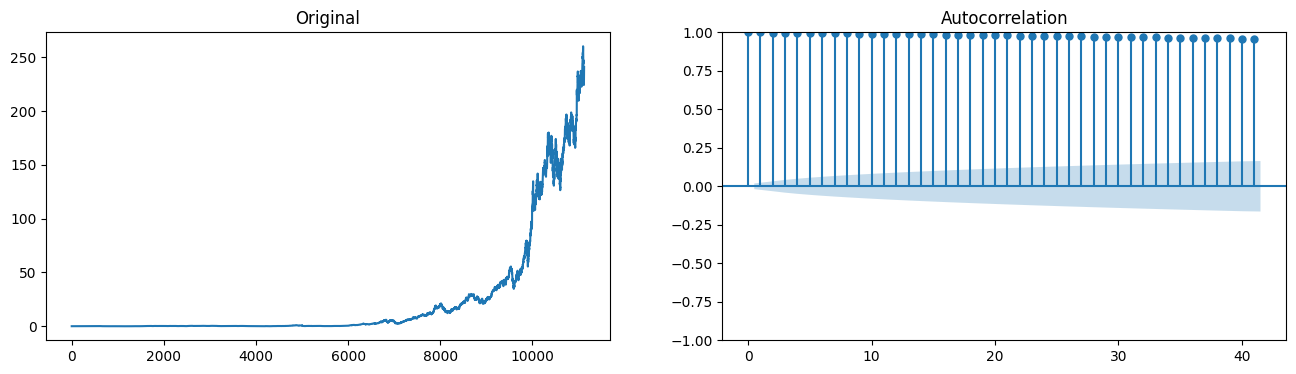

In [14]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.High)
ax1.set_title("Original")
#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.High, ax=ax2);

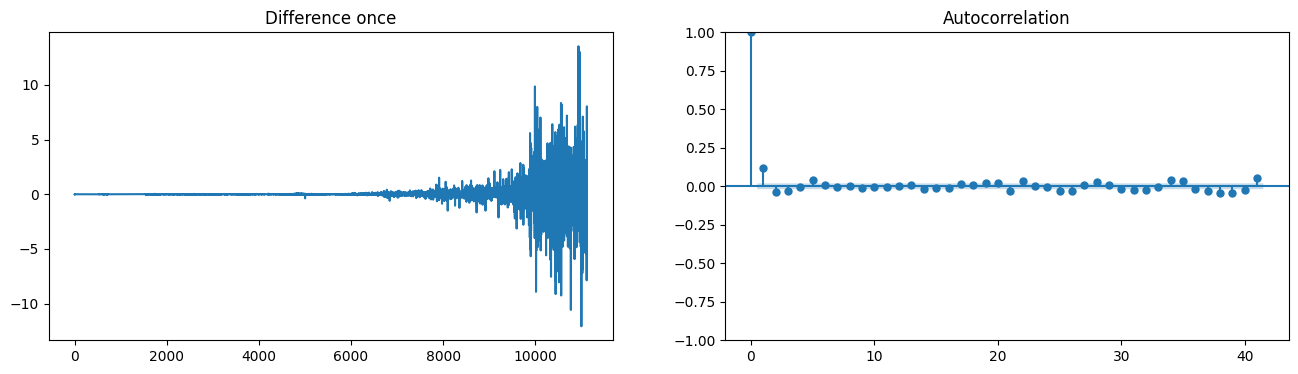

In [15]:
diff = df.High.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);

In [16]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.7 MB/s eta 0:00:00


In [17]:
#pipenv install --skip-lock pmdarima
from pmdarima.arima.utils import ndiffs

ndiffs(df.High, test="adf")

1

Then d value is 1

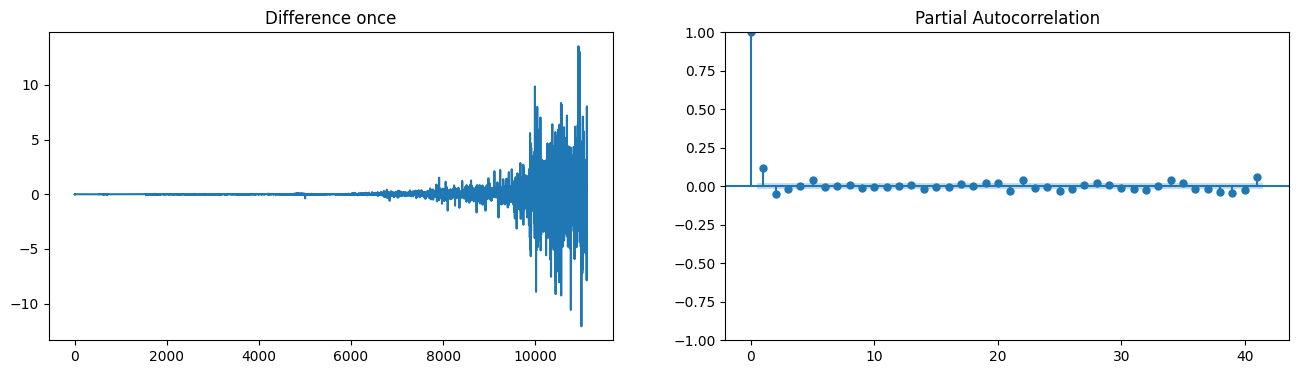

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
diff =df.High.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

p=1

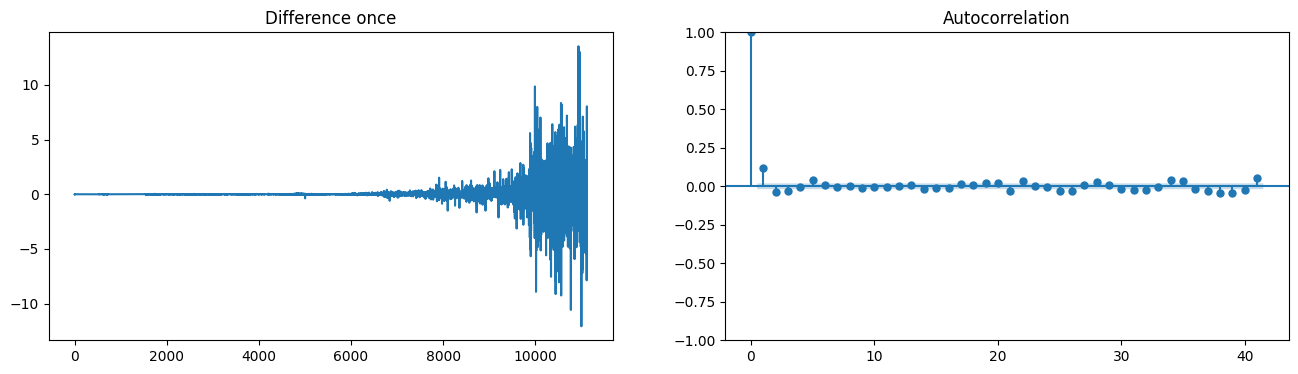

In [20]:
diff =df.High.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

q=1

## Based on the results p=1 and q=1 and d=1

In [21]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
import logging
logging.getLogger("statsmodels").setLevel(logging.ERROR)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['High'], order=(1, 1, 1))

# Fit the model
result = model.fit()

In [23]:
# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                11124
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13840.336
Date:                Wed, 26 Feb 2025   AIC                          27686.671
Time:                        17:25:22   BIC                          27708.621
Sample:                             0   HQIC                         27694.062
                              - 11124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1785      0.024     -7.523      0.000      -0.225      -0.132
ma.L1          0.3028      0.023     13.005      0.000       0.257       0.348
sigma2         0.7052      0.002    350.290      0.0

(array([7.02088470e-05, 2.80835388e-04, 8.77610587e-04, 5.75712545e-03,
        3.60978787e-01, 1.88510754e-02, 2.98387600e-03, 4.91461929e-04,
        1.40417694e-04, 7.02088470e-05]),
 array([-12.22324895,  -9.66244002,  -7.1016311 ,  -4.54082217,
         -1.98001324,   0.58079568,   3.14160461,   5.70241353,
          8.26322246,  10.82403138,  13.38484031]),
 <BarContainer object of 10 artists>)

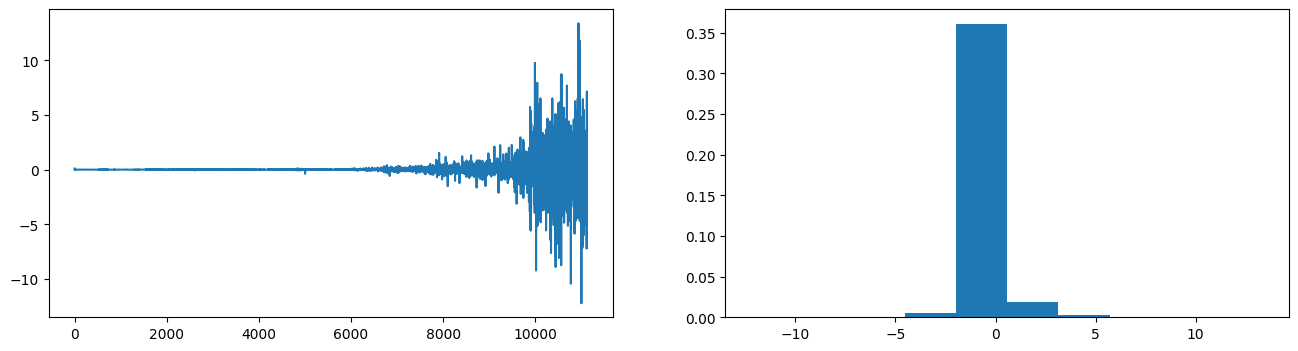

In [24]:
#residuals
residuals = pd.DataFrame(result.resid)
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals, density=True)

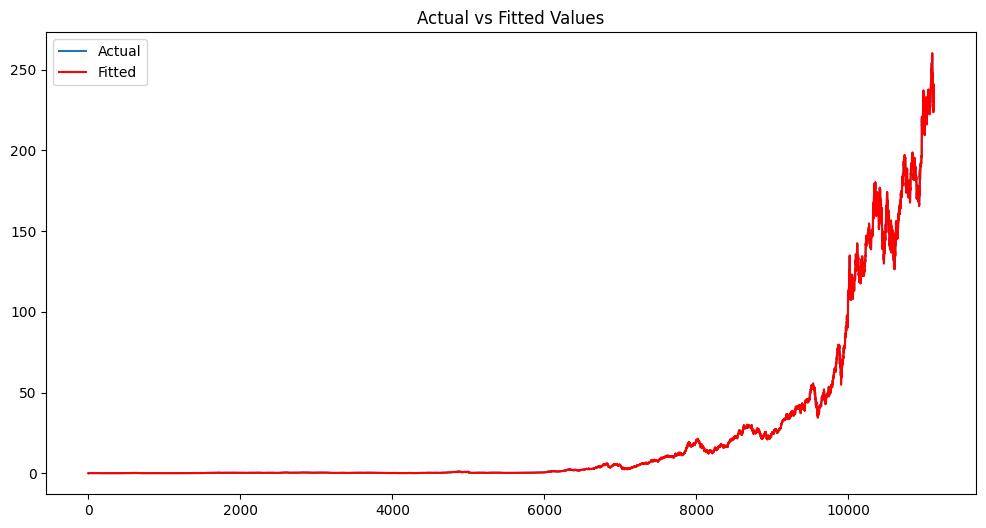

In [25]:
#actual vs Fitted

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Actual')
plt.plot(result.fittedvalues, label='Fitted', color='red')
plt.title("Actual vs Fitted Values")
plt.legend()
plt.show()

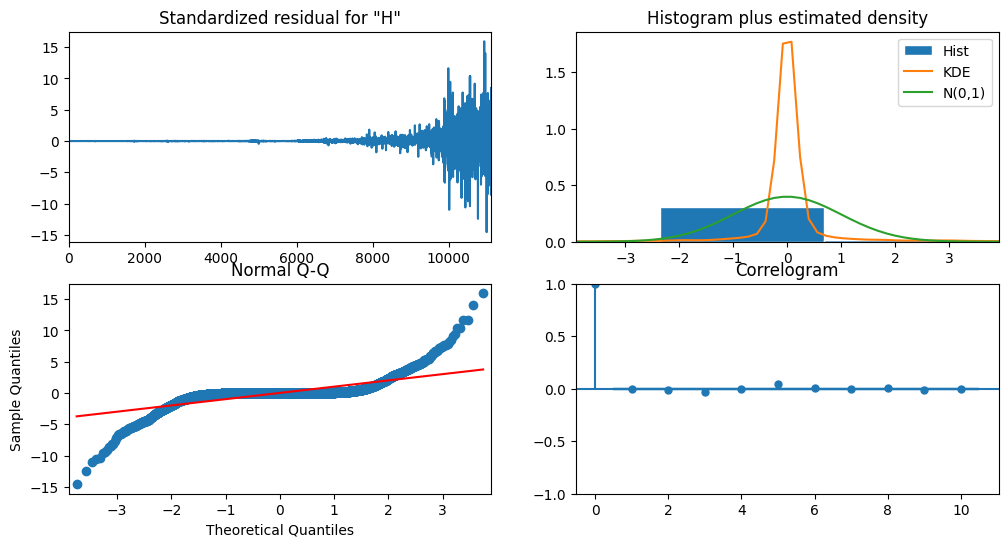

In [26]:
import matplotlib.pyplot as plt

result.plot_diagnostics(figsize=(12, 6))
plt.show()

In [27]:
import numpy as np

# Assuming df['target_variable'] is your actual values
fitted_values = result.fittedvalues
residuals = df['High'] - fitted_values
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 0.8397216356785095


In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(df['High'], result.fittedvalues)
print(f"R-squared: {r2}")

R-squared: 0.9997275884287568


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs Fitted values
y_actual = df['High']
y_pred = result.fittedvalues

# R-squared
r2 = r2_score(y_actual, y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error
mae = mean_absolute_error(y_actual, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.9997275884287568
Mean Absolute Error: 0.265056094285515
Mean Squared Error: 0.7051324254265915
Root Mean Squared Error: 0.8397216356785095


- R-squared indicates 99.97% of the variance is explained.
- MAE is 0.265, showing small average prediction errors.
- RMSE is 0.8397, also indicating relatively low error.

# Let split the dataset and the run the ARIMAX model

In [30]:
n = int(len(df) * 0.8)
train = df.High[:n]
test = df.High[n:]

In [31]:
print(len(train))
print(len(test))

8899
2225


In [32]:
train.head()

,High
0,0.10
1,0.09
2,0.09
3,0.09
4,0.09


In [33]:
# Define the ARIMA model
model = ARIMA(train, order=(1, 1, 1))

# Fit the model
result = model.fit()

In [34]:
# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 8899
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7377.255
Date:                Wed, 26 Feb 2025   AIC                         -14748.510
Time:                        17:32:51   BIC                         -14727.229
Sample:                             0   HQIC                        -14741.264
                               - 8899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1992      0.025     -8.102      0.000      -0.247      -0.151
ma.L1          0.3436      0.023     14.633      0.000       0.298       0.390
sigma2         0.0112    3.7e-05    301.345      0.0

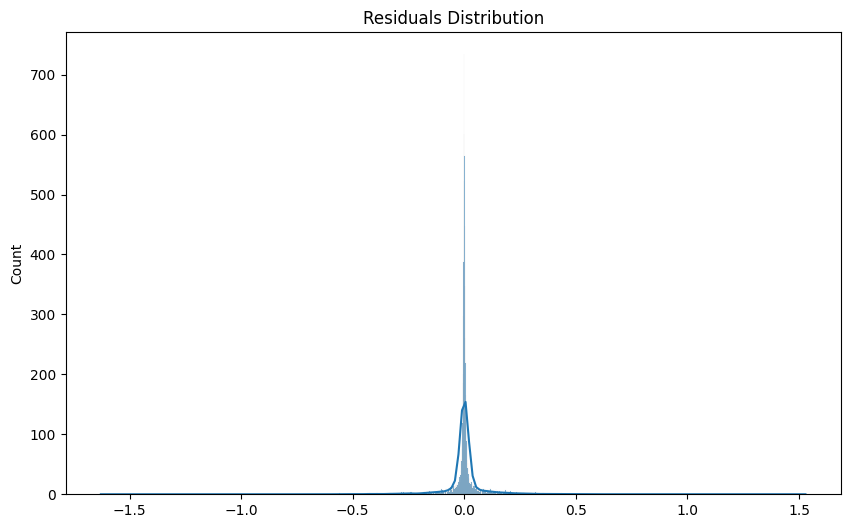

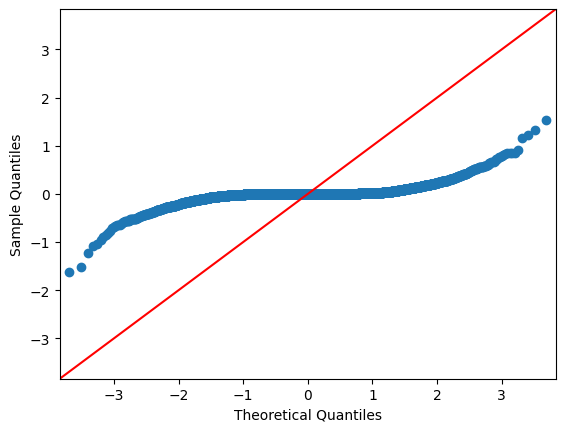

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Get the residuals
residuals = result.resid

# Plot residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)  # Histogram and Kernel Density Estimate
plt.title("Residuals Distribution")
plt.show()

# Q-Q Plot to check for normality
sm.qqplot(residuals, line='45')
plt.show()

In [37]:
from scipy import stats

# Perform the Jarque-Bera test
jb_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera Test Statistic: {jb_stat}, p-value: {jb_p_value}")

Jarque-Bera Test Statistic: 636319.566084522, p-value: 0.0


In [46]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define range for p, d, q
p = d = q = range(0, 3)
parameters = list(itertools.product(p, d, q))

# Store results
results = []

for param in parameters:
    try:
        model = ARIMA(df['High'], order=param)
        model_fit = model.fit()
        results.append((param, model_fit.aic))
    except:
        continue

# Sort results by AIC
results_df = pd.DataFrame(results, columns=['Parameters', 'AIC'])
print(results_df.sort_values(by='AIC').head())


   Parameters           AIC
26  (2, 2, 2)  27671.135657
25  (2, 2, 1)  27671.927810
23  (2, 1, 2)  27676.360460
22  (2, 1, 1)  27679.544746
21  (2, 1, 0)  27679.673441


In [52]:
# Define the ARIMA model
model = ARIMA(train, order=(2, 2, 2))

# Fit the model
result = model.fit()

# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 8899
Model:                 ARIMA(2, 2, 2)   Log Likelihood                7376.965
Date:                Wed, 26 Feb 2025   AIC                         -14743.931
Time:                        18:05:52   BIC                         -14708.464
Sample:                             0   HQIC                        -14731.855
                               - 8899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0163      0.076     -0.216      0.829      -0.164       0.132
ar.L2         -0.0295      0.012     -2.495      0.013      -0.053      -0.006
ma.L1         -0.8361      0.076    -11.015      0.0

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_actual = df['High']
y_pred = result.predict(start=train.index[0], end=train.index[-1])

# R-squared
r2 = r2_score(y_actual[:len(y_pred)], y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error
mae = mean_absolute_error(y_actual[:len(y_pred)], y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_actual[:len(y_pred)], y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.9997574847592912
Mean Absolute Error: 0.03990026274089298
Mean Squared Error: 0.011141947467786554
Root Mean Squared Error: 0.10555542367773696


These metrics suggest that your ARIMAX model is well-tuned and performing excellently, providing highly accurate predictions with minimal error.

# Sarimax Model

In [20]:
import statsmodels.api as sm
import numpy as np

# Ensure no NaN or infinite values
df['High'] = df['High'].replace([np.inf, -np.inf], np.nan).dropna()

# Reduce dataset size for faster training
df_sample = df.sample(frac=0.5, random_state=42)  # Use 50% of data

# Fit SARIMAX
model = sm.tsa.statespace.SARIMAX(df_sample['High'], order=(2,1,2), seasonal_order=(1,1,1,52))
results = model.fit(disp=False, method='powell', maxiter=50)

# Print summary
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 High   No. Observations:                 5562
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood              -29493.740
Date:                              Wed, 26 Feb 2025   AIC                          59001.480
Time:                                      20:09:40   BIC                          59047.779
Sample:                                           0   HQIC                         59017.627
                                             - 5562                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8939      0.322     -2.777      0.005      -1.525      -0.263
ar.L2         -0.00

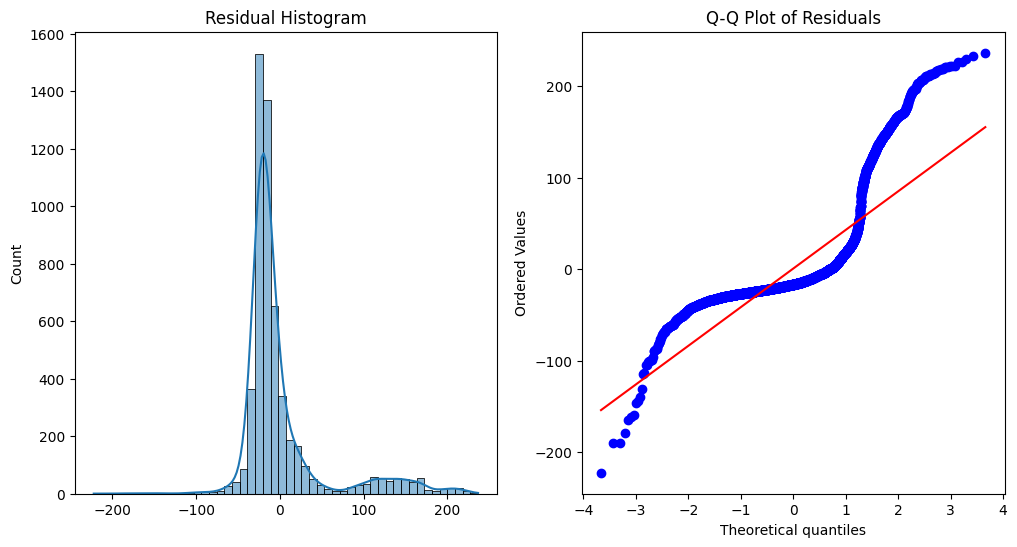

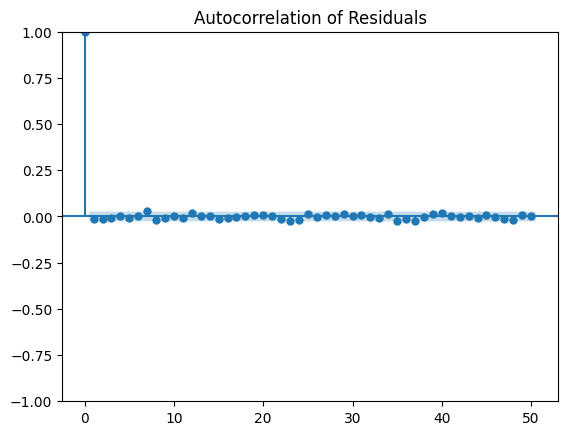

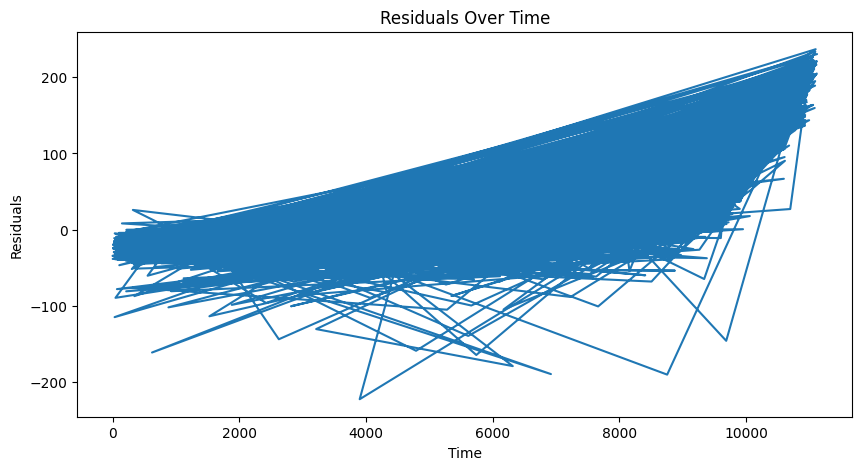

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot

# Plot residuals
residuals = results.resid

plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residual Histogram')

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.show()

# Autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=50)
plt.title("Autocorrelation of Residuals")
plt.show()

# Heteroskedasticity check
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [22]:
from scipy.stats import boxcox

df['High_BoxCox'], lambda_val = boxcox(df['High'] + 1)

print(f"Optimal λ for Box-Cox Transformation: {lambda_val}")

Optimal λ for Box-Cox Transformation: -0.43700974535727477


In [23]:
import statsmodels.api as sm

# Reduce dataset size if needed
df_small = df.tail(3000)

# Fit SARIMAX with memory optimizations
model_bc = sm.tsa.statespace.SARIMAX(
    df_small['High_BoxCox'],
    order=(2,2,2),
    seasonal_order=(1,1,1,52),
    simple_differencing=True  #
)

results_bc = model_bc.fit(method='powell', maxiter=500, cov_type="none")
print(results_bc.summary())

Optimization terminated successfully.
         Current function value: -4.497961
         Iterations: 4
         Function evaluations: 373
                                      SARIMAX Results                                       
Dep. Variable:                  D2.DS52.High_BoxCox   No. Observations:                 2946
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 52)   Log Likelihood               13250.994
Date:                              Wed, 26 Feb 2025   AIC                         -26487.988
Time:                                      20:11:00   BIC                         -26446.071
Sample:                                           0   HQIC                        -26472.897
                                             - 2946                                         
Covariance Type:                       Not computed                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [16]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 20.6 MB/s eta 0:00:00


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -29789.5
Distribution:                  Normal   AIC:                           59587.0
Method:            Maximum Likelihood   BIC:                           59613.5
                                        No. Observations:                 5562
Date:                Wed, Feb 26 2025   Df Residuals:                     5561
Time:                        20:11:51   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.9002      0.700      1.286      0.199 [ -0.472,  2.27

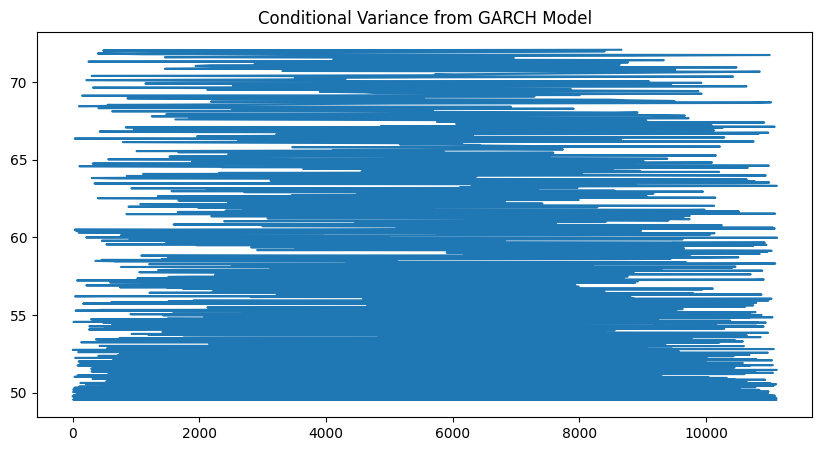

In [24]:
from arch import arch_model

# Fit a GARCH(1,1) model on residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp="off")

print(garch_results.summary())

# Plot conditional variance
plt.figure(figsize=(10, 5))
plt.plot(garch_results.conditional_volatility)
plt.title('Conditional Variance from GARCH Model')
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("✅ Data is stationary (p < 0.05)")
else:
    print("⚠️ Data is non-stationary (p >= 0.05) - Consider differencing")

ADF Statistic: 4.670335255751348
p-value: 1.0
⚠️ Data is non-stationary (p >= 0.05) - Consider differencing


In [6]:
import numpy as np

Q1 = df['High'].quantile(0.25)
Q3 = df['High'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[(df['High'] >= Q1 - 1.5 * IQR) & (df['High'] <= Q3 + 1.5 * IQR)]

In [ ]:
import numpy as np
import itertools
import statsmodels.api as sm

# Define parameter ranges
p = d = q = [0, 1, 2]
P = D = Q = [0, 1]
s = [52]

best_aic = np.inf
best_params = None

# Grid search
for params in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df['High'],
            order=params[:3],
            seasonal_order=params[3:]
        )
        results = model.fit(disp=0)

        # Store best model
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = params
            print(f"New Best: {params}, AIC: {best_aic}")

    except Exception as e:
        print(f"Failed for {params}: {e}")
        continue  # Skip to next combination

print(f"\n✅ Best SARIMAX Parameters: {best_params}, AIC: {best_aic}")

New Best: (0, 0, 0, 0, 0, 0, 52), AIC: 121240.36791260511
New Best: (0, 0, 0, 0, 0, 1, 52), AIC: 107393.8964165969
New Best: (0, 0, 0, 0, 1, 0, 52), AIC: 73060.78485224365
